<a href="https://colab.research.google.com/github/dfukagaw28/ColabNotebooks/blob/main/mmdet%E3%82%92%E8%A9%A6%E3%81%99_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mmdet を試す (1)

物体検出ライブラリ MMDetection を使ってみる。

以下を参考にしたが，記事公開当時（約20ヶ月前？）から変更が生じておりそのままでは動かない箇所があったため，修正した。

*   https://github.com/saliton/MMDetection

このノートブックは，Colab で，GPU を使って実行することを想定している。

## mmdet をインストール（失敗）

とりあえずインストールする。

In [1]:
!pip install mmdet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.1 MB/s eta 0:00:00


インストールはすぐ終わる。ライブラリを import する。

In [2]:
import mmdet

ModuleNotFoundError: No module named 'mmcv'

エラーが発生する。依存するライブラリ `mmcv` が見つからない，とのこと。

## mmcv をインストール（失敗）

[MMCV](https://github.com/open-mmlab/mmcv) をインストールする。

*   かつて mmcv 1.x の頃は， ``mmcv` と `mmcv-full` という名称だった。
*   ややこしいことに， mmcv 2.x 移行は `mmcv` が `mmcv-lite` に， `mmcv-full` が `mmcv` にそれぞれ名称変更された。
*   今回欲しいのは現 `mmcv`（つまり旧 `mmcv-full`）である。

普通にインストールを試みると，ソースコードからビルドが始まるため，とても時間がかかる（数十分とかいうレベル）。Colab は環境構築が毎回必要であるから，このような使い方は合わない。

```
!pip install mmcv

Collecting mmcv
  Downloading mmcv-2.2.0.tar.gz (479 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.1/479.1 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Collecting addict (from mmcv)
  Downloading addict-2.4.0-py3-none-any.whl.metadata (1.0 kB)
Collecting mmengine>=0.3.0 (from mmcv)
  Downloading mmengine-0.10.5-py3-none-any.whl.metadata (20 kB)
(...snip...)
Building wheels for collected packages: mmcv
  Building wheel for mmcv (setup.py) ...
```

なぜこのように時間がかかるのかといえば，PyPI（Python Package Index）に wheel ファイルが存在しないためである。

OpenMMLab の wheel ファイルは PyPI でなく他の場所に置いてある。したがって，インストールは pip でなく mim コマンドで実行するのが標準的らしい。

openmim をインストールする。

次のセルを実行すると，途中で「セッションを再起動する」というダイアログが表示される。セッションを再起動して，同じセルをもう一度実行する。

```
セッションを再起動する
WARNING: The following packages were previously imported in this runtime:
  [_distutils_hack,pkg_resources,setuptools]
You must restart the runtime in order to use newly installed versions.

Restarting will lose all runtime state, including local variables.
```

In [1]:
!pip install openmim

mim を使って mmcv をインストールする。

In [2]:
!mim install mmcv

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.4.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.3/452.3 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 19.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mmdet 3.3.0 requires mmcv<2.2.0,>=2.0.0rc4; extra == "mim", but you have mmcv 2.2.0 which is incompatible.


簡単にインストールできた。

import してみよう。

In [5]:
import mmcv

In [6]:
!mim install mmdet

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.4.0/index.html
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment


In [7]:
import mmdet

AssertionError: MMCV==2.2.0 is used but incompatible. Please install mmcv>=2.0.0rc4, <2.2.0.

エラーが発生する。バージョンが合っていないらしい。

## mmcv を再インストールする

普通に `!mim install 'mmcv<2.2.0'` を実行すると，やはりビルドが始まる。

この原因は，以下のファイルに 2.2.0 以外のリンクが存在しないことらしい。
https://download.openmmlab.com/mmcv/dist/cu121/torch2.4.0/index.html

そもそも，Colab にインストールされている CUDA や PyTorch のバージョンとも整合性がない。

Colab の CUDA バージョンを確認する。

In [8]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


PyTorch のバージョンも確認する。

In [9]:
!python -c 'import torch; print(torch.__version__)'

2.4.1+cu121


PyTorch の CUDA バージョンが実際のものと合っていないが，気にしない。

調べてみると，mmcv の `<2.2.0` の wheel ファイルは

*   https://download.openmmlab.com/mmcv/dist/cu121/torch2.4/index.html ❌存在しない
*   https://download.openmmlab.com/mmcv/dist/cu121/torch2.3/index.html ❌存在しない
*   https://download.openmmlab.com/mmcv/dist/cu121/torch2.2/index.html ❌存在しない
*   https://download.openmmlab.com/mmcv/dist/cu121/torch2.1/index.html ✅存在する

仕方がないので PyTorch のバージョンを下げる。

*   torch: 2.4.1+cu121  -->  2.1.0+cu121
*   torchvision: 0.19.1+cu121  -->  0.19.0+cu121
*   torchaudio: 2.4.1+cu121  -->  2.4.0+cu121

少し時間がかかる（１～２分程度）。

ここでも「セッションを再起動する」が表示されるため，クリックして再起動して同じセルを実行する。

In [1]:
%%time
!pip install torch==2.1 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
CPU times: user 30.5 ms, sys: 6.05 ms, total: 36.5 ms
Wall time: 3.32 s


mmcv をインストールする。

In [2]:
!mim install 'mmcv<2.2.0' -f https://download.openmmlab.com/mmcv/dist/cu121/torch2.1/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1/index.html, https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: mmcv
    Found existing installation: mmcv 2.2.0
    Uninstalling mmcv-2.2.0:
      Successfully uninstalled mmcv-2.2.0


In [3]:
import mmcv

In [4]:
import mmdet

import できた。

## 物体検出 Faster R-CNN を試す

次に学習済みモデルを取得して，物体検出を試してみる。

[MMDetection](https://github.com/open-mmlab/mmdetection)のページには様々なモデルが載っている。

今回は Faster R-CNN (NeurIPS'2015) を使ってみる。

Model Zoo の表からモデルを見つけてリンクを辿る。

[Faster R-CNN](https://github.com/open-mmlab/mmdetection/tree/main/configs/faster_rcnn) には，さらにモデルが細分化されている。

今回は R-50-FPN	pytorch	1x を用いる。

In [6]:
# Faster R-CNN
!wget -P /content https://download.openxlab.org.cn/models/mmdetection/FasterR-CNN/weight/faster-rcnn_r50_fpn_1x_coco

--2024-10-15 17:55:28--  https://download.openxlab.org.cn/models/mmdetection/FasterR-CNN/weight/faster-rcnn_r50_fpn_1x_coco
Resolving download.openxlab.org.cn (download.openxlab.org.cn)... 39.96.127.27
Connecting to download.openxlab.org.cn (download.openxlab.org.cn)|39.96.127.27|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cdn-model.openxlab.org.cn/models%2Fweight%2Fmmdetection%2FFaster+R-CNN%2Ffaster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth?Expires=1729018529&OSSAccessKeyId=LTAI5tCdKkrGqdpR7PDyejq7&Signature=euzEEWWJKnadCEjGRP20IJ%2FjSpg%3D&response-content-disposition=attachment%3B%20filename%3Dfaster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth [following]
--2024-10-15 17:55:29--  https://cdn-model.openxlab.org.cn/models%2Fweight%2Fmmdetection%2FFaster+R-CNN%2Ffaster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth?Expires=1729018529&OSSAccessKeyId=LTAI5tCdKkrGqdpR7PDyejq7&Signature=euzEEWWJKnadCEjGRP20IJ%2FjSpg%3D&response-content-di

次に必要なモジュールをimportする。

In [7]:
from mmdet.apis.inference import init_detector, inference_detector

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Warning が出ている。言われたとおりにやっておく。

またセッションの再起動が必要。

In [1]:
!pip install -U albumentations

改めて import する。

In [2]:
from mmdet.apis.inference import init_detector, inference_detector

warning がなくなった。

In [3]:
help(init_detector)

Help on function init_detector in module mmdet.apis.inference:

init_detector(config: Union[str, pathlib.Path, mmengine.config.config.Config], checkpoint: Optional[str] = None, palette: str = 'none', device: str = 'cuda:0', cfg_options: Optional[dict] = None) -> torch.nn.modules.module.Module
    Initialize a detector from config file.
    
    Args:
        config (str, :obj:`Path`, or :obj:`mmengine.Config`): Config file path,
            :obj:`Path`, or the config object.
        checkpoint (str, optional): Checkpoint path. If left as None, the model
            will not load any weights.
        palette (str): Color palette used for visualization. If palette
            is stored in checkpoint, use checkpoint's palette first, otherwise
            use externally passed palette. Currently, supports 'coco', 'voc',
            'citys' and 'random'. Defaults to none.
        device (str): The device where the anchors will be put on.
            Defaults to cuda:0.
        cfg_options (

init_detector の引数には config ファイルを渡すのだが，ファイルは複数あって個別にダウンロードが必要。

In [25]:
paths = [
    'configs/faster_rcnn/faster-rcnn_r50_fpn_1x_coco.py',
    'configs/_base_/models/faster-rcnn_r50_fpn.py',
    'configs/_base_/datasets/coco_detection.py',
    'configs/_base_/schedules/schedule_1x.py',
    'configs/_base_/default_runtime.py',
]

from pathlib import Path

for path in paths:
  path = Path(path)
  dir = path.parent
  !rm -rf {path}
  !wget -P /content/{dir} https://raw.githubusercontent.com/open-mmlab/mmdetection/refs/heads/main/{path}

--2024-10-15 18:13:25--  https://raw.githubusercontent.com/open-mmlab/mmdetection/refs/heads/main/configs/faster_rcnn/faster-rcnn_r50_fpn_1x_coco.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177 [text/plain]
Saving to: ‘/content/configs/faster_rcnn/faster-rcnn_r50_fpn_1x_coco.py’

faster-rcnn_r50_fpn 100%[===================>]     177  --.-KB/s    in 0s      

2024-10-15 18:13:25 (2.67 MB/s) - ‘/content/configs/faster_rcnn/faster-rcnn_r50_fpn_1x_coco.py’ saved [177/177]

--2024-10-15 18:13:25--  https://raw.githubusercontent.com/open-mmlab/mmdetection/refs/heads/main/configs/_base_/models/faster-rcnn_r50_fpn.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.git

In [26]:
model = init_detector('configs/faster_rcnn/faster-rcnn_r50_fpn_1x_coco.py', '/content/faster-rcnn_r50_fpn_1x_coco', device='cuda:0')

Loads checkpoint by local backend from path: /content/faster-rcnn_r50_fpn_1x_coco


デモ用の画像ファイルをダウンロードする。

In [27]:
!wget -P demo https://raw.githubusercontent.com/open-mmlab/mmdetection/refs/heads/main/demo/demo.jpg

--2024-10-15 18:15:08--  https://raw.githubusercontent.com/open-mmlab/mmdetection/refs/heads/main/demo/demo.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259865 (254K) [image/jpeg]
Saving to: ‘demo/demo.jpg’

demo.jpg            100%[===================>] 253.77K  --.-KB/s    in 0.01s   

2024-10-15 18:15:08 (19.5 MB/s) - ‘demo/demo.jpg’ saved [259865/259865]



物体認識を実行する。

In [28]:
result = inference_detector(model, 'demo/demo.jpg')

結果を表示したいが，show_result_pyplot関数はなくなったらしい。

公式チュートリアルによれば，他の方法があるらしい。

https://github.com/open-mmlab/mmdetection/blob/main/demo/MMDet_Tutorial.ipynb

In [34]:
from mmdet.apis import DetInferencer

In [36]:
model_name = 'configs/faster_rcnn/faster-rcnn_r50_fpn_1x_coco.py'
inferencer = DetInferencer(model_name)

/usr/local/lib/python3.10/dist-packages/mmdet/apis/det_inferencer.py:135: UserWarning: Checkpoint is not loaded, and the inference result is calculated by the randomly initialized model!
  warnings.warn('Checkpoint is not loaded, and the inference '
/usr/local/lib/python3.10/dist-packages/mmdet/apis/det_inferencer.py:138: UserWarning: weights is None, use COCO classes by default.
  warnings.warn('weights is None, use COCO classes by default.')
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


警告はいったん無視する。

物体認識を実行する。

In [37]:
img = './demo/demo.jpg'
result = inferencer(img, out_dir='./output')

Output()

認識結果には，以下のような情報が保存されている。

In [38]:
from rich.pretty import pprint
pprint(result, max_length=4)

{
│   'predictions': [{'labels': [], 'scores': [], 'bboxes': []}],
│   'visualization': [
│   │   array([[[ 28,  48,  13],
│   │   [ 37,  63,  28],
│   │   [ 30,  64,  27],
│   │   ...,
│   │   [ 23,  47,  31],
│   │   [ 31,  67,  31],
│   │   [ 54,  92,  17]],
│      
│      [[ 23,  42,   0],
│   │   [ 25,  50,   8],
│   │   [ 30,  62,  21],
│   │   ...,
│   │   [ 92, 114, 102],
│   │   [ 16,  53,  12],
│   │   [ 44,  75,  16]],
│      
│      [[ 20,  50,   0],
│   │   [ 25,  59,   8],
│   │   [ 29,  66,  23],
│   │   ...,
│   │   [ 47,  70,  44],
│   │   [ 29,  60,  18],
│   │   [ 54,  77,  31]],
│      
│      ...,
│      
│      [[ 63,  68,  45],
│   │   [ 58,  66,  27],
│   │   [ 74,  84,  49],
│   │   ...,
│   │   [ 32,  46,  23],
│   │   [ 56,  76,  39],
│   │   [ 31,  47,  18]],
│      
│      [[ 60,  66,  40],
│   │   [ 45,  55,  18],
│   │   [ 83,  92,  61],
│   │   ...,
│   │   [ 63,  77,  54],
│   │   [ 47,  67,  30],
│   │   [ 35,  52,  20]],
│      
│      [[ 64,  70,  42],
│   │   [ 85,  95,  60],
│   │   [ 66,  75,  48],
│   │   ...,
│   │   [ 37,  51,  28],
│   │   [ 59,  79,  42],
│   │   [ 44,  61,  29]]], dtype=uint8)
│   ]
}

この認識結果を可視化した画像は以下の通り。

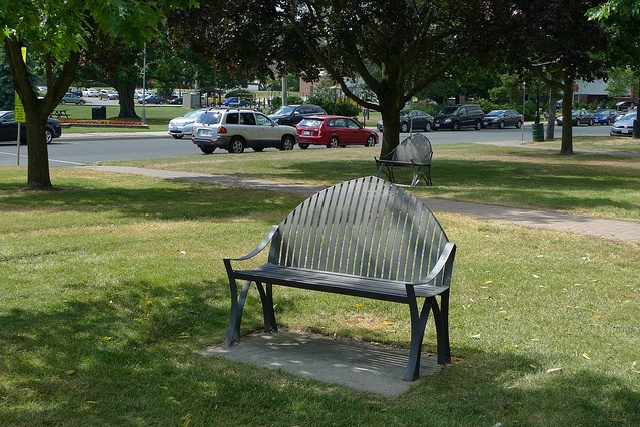

In [39]:
# Show the output image
from PIL import Image
Image.open('./output/vis/demo.jpg')

認識結果の `predictions` が空になっている通り，まったく物体検出できていない。

## RTMDet

モデルを変更して試してみよう。

In [44]:
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest .

processing rtmdet_tiny_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 MiB 82.9 MB/s eta 0:00:00
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to /content
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /content


In [46]:
# Choose to use a config
model_name = './rtmdet_tiny_8xb32-300e_coco.py'
# Setup a checkpoint file to load
checkpoint = './rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(model_name, checkpoint, device)

Loads checkpoint by local backend from path: ./rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



In [47]:
img = './demo/demo.jpg'
result = inferencer(img, out_dir='./output')

Output()

In [48]:
from rich.pretty import pprint
pprint(result, max_length=4)

{
│   'predictions': [
│   │   {
│   │   │   'labels': [13, 2, 2, 2, ... +296],
│   │   │   'scores': [0.8703235983848572, 0.7677358984947205, 0.7427825927734375, 0.6994597315788269, ... +296],
│   │   │   'bboxes': [
│   │   │   │   [221.37188720703125, 176.1280975341797, 456.25811767578125, 383.2401123046875],
│   │   │   │   [295.3505859375, 117.18350219726562, 378.571533203125, 150.27117919921875],
│   │   │   │   [190.573486328125, 109.70985412597656, 299.52215576171875, 155.0396270751953],
│   │   │   │   [431.36944580078125, 104.98468780517578, 484.879150390625, 131.94033813476562],
│   │   │   │   ... +296
│   │   │   ]
│   │   }
│   ],
│   'visualization': [
│   │   array([[[ 28,  48,  13],
│   │   [ 37,  63,  28],
│   │   [ 30,  64,  27],
│   │   ...,
│   │   [ 23,  47,  31],
│   │   [ 31,  67,  31],
│   │   [ 54,  92,  17]],
│      
│      [[ 23,  42,   0],
│   │   [ 25,  50,   8],
│   │   [ 30,  62,  21],
│   │   ...,
│   │   [ 92, 114, 102],
│   │   [ 16,  53,  12],
│   │   [ 44,  75,  16]],
│      
│      [[ 20,  50,   0],
│   │   [ 25,  59,   8],
│   │   [ 29,  66,  23],
│   │   ...,
│   │   [ 47,  70,  44],
│   │   [ 29,  60,  18],
│   │   [ 54,  77,  31]],
│      
│      ...,
│      
│      [[ 63,  68,  45],
│   │   [ 58,  66,  27],
│   │   [ 74,  84,  49],
│   │   ...,
│   │   [ 32,  46,  23],
│   │   [ 56,  76,  39],
│   │   [ 31,  47,  18]],
│      
│      [[ 60,  66,  40],
│   │   [ 45,  55,  18],
│   │   [ 83,  92,  61],
│   │   ...,
│   │   [ 63,  77,  54],
│   │   [ 47,  67,  30],
│   │   [ 35,  52,  20]],
│      
│      [[ 64,  70,  42],
│   │   [ 85,  95,  60],
│   │   [ 66,  75,  48],
│   │   ...,
│   │   [ 37,  51,  28],
│   │   [ 59,  79,  42],
│   │   [ 44,  61,  29]]], dtype=uint8)
│   ]
}

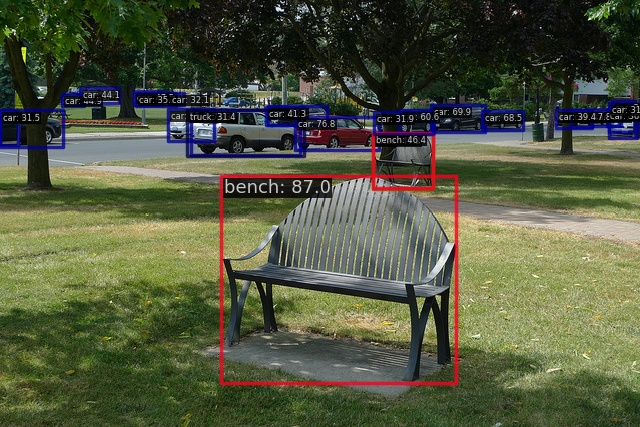

In [49]:
# Show the output image
from PIL import Image
Image.open('./output/vis/demo.jpg')

概ね正しく動作しているようだ。

ちなみに，ここで試したモデルは RTMDet (ArXiv'2022) である。

## 再び Faster R-CNN

Faster R-CNN が動作しなかったのは，やり方が悪かったからかもしれない。

In [50]:
!mim download mmdet --config faster-rcnn_r50_fpn_1x_coco --dest .

processing faster-rcnn_r50_fpn_1x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 MiB 50.4 MB/s eta 0:00:00
Successfully downloaded faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth to /content
Successfully dumped faster-rcnn_r50_fpn_1x_coco.py to /content


Loads checkpoint by local backend from path: ./faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


Output()

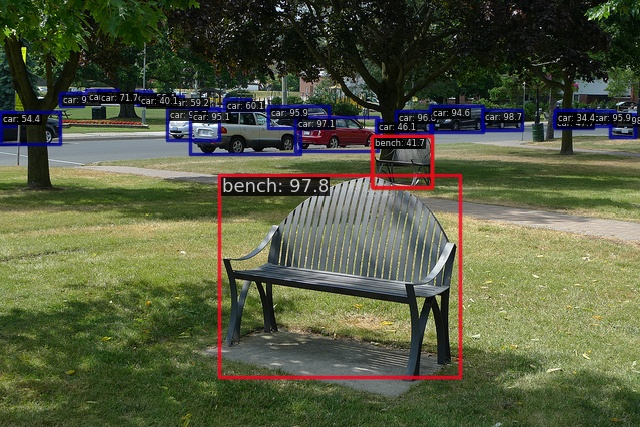

In [52]:
model_name = './faster-rcnn_r50_fpn_1x_coco.py'
checkpoint = './faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
inferencer = DetInferencer(model_name, checkpoint)

img = './demo/demo.jpg'
result = inferencer(img, out_dir='./output')

Image.open('./output/vis/demo.jpg')

ちゃんと動いた。

ひょっとすると，checkpoint のファイル名がまずかった（モデル名とファイル名を区別しているらしく，紛らわしいファイル名だと動かない？）のかもしれない（が，ちゃんと調べてはいない）。

## Mask R-CNN

Mask R-CNN も試してみよう。

物体の領域も検出してくれる。

In [55]:
!mim download mmdet --config mask-rcnn_r50_fpn_1x_coco --dest .

processing mask-rcnn_r50_fpn_1x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 MiB 75.5 MB/s eta 0:00:00
Successfully downloaded mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth to /content
Successfully dumped mask-rcnn_r50_fpn_1x_coco.py to /content


Loads checkpoint by local backend from path: ./mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth


Output()

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


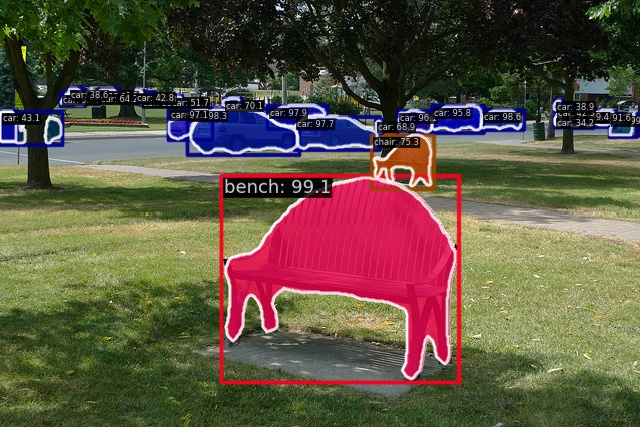

In [58]:
model_name = './mask-rcnn_r50_fpn_1x_coco.py'
checkpoint = './mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth'
inferencer = DetInferencer(model_name, checkpoint)

img = './demo/demo.jpg'
result = inferencer(img, out_dir='./output')

Image.open('./output/vis/demo.jpg')